<a href="https://colab.research.google.com/github/EronDS/DataScience/blob/main/OptimalityTheory/OptimalityTheory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimality theory is the notion that **adaptive**  behaviors have better benefits-to-costs-ratios than the putative alternatives that have been replaced by natural selection.  ***Read the ReadMe.txt for advanced information about the topic and decisions made in the process of modeling.***

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import random

In [2]:
costs = list(range(-1000 , 1000 , 5 ))
Costs = []

for i in costs:
  Costs.append(i / 1000)

Benefits = Costs

In [3]:
choiceCost = [] 
choiceBenefits = [] 
Delta = []


for i in range(100):
  cost = random.choice(Costs)
  choiceCost.append(cost)
  benefit = random.choice(Benefits)
  choiceBenefits.append(benefit)
  delta = (benefit - cost) 
  Delta.append(delta)

In [4]:
df = pd.DataFrame()
df['Costs'] = choiceCost
df['Benefits'] = choiceBenefits 
df['Δ (Benefits - Costs)'] = Delta 
df


,Costs,Benefits,Δ (Benefits - Costs)
0,-0.545,0.645,1.190
1,0.390,0.675,0.285
2,0.070,-0.765,-0.835
3,-0.915,-0.105,0.810
4,0.825,-0.915,-1.740
...,...,...,...
95,0.850,0.900,0.050
96,-0.970,0.995,1.965
97,-0.375,-0.510,-0.135
98,0.305,0.815,0.510


In [5]:
scale = []
for i in range(0 ,1000, 10):
  scale.append(i / 1000)

Text(0.0, 1.0, 'Cost and Benefits in Individual Fitness for each Possible Behavior or Characteristic')

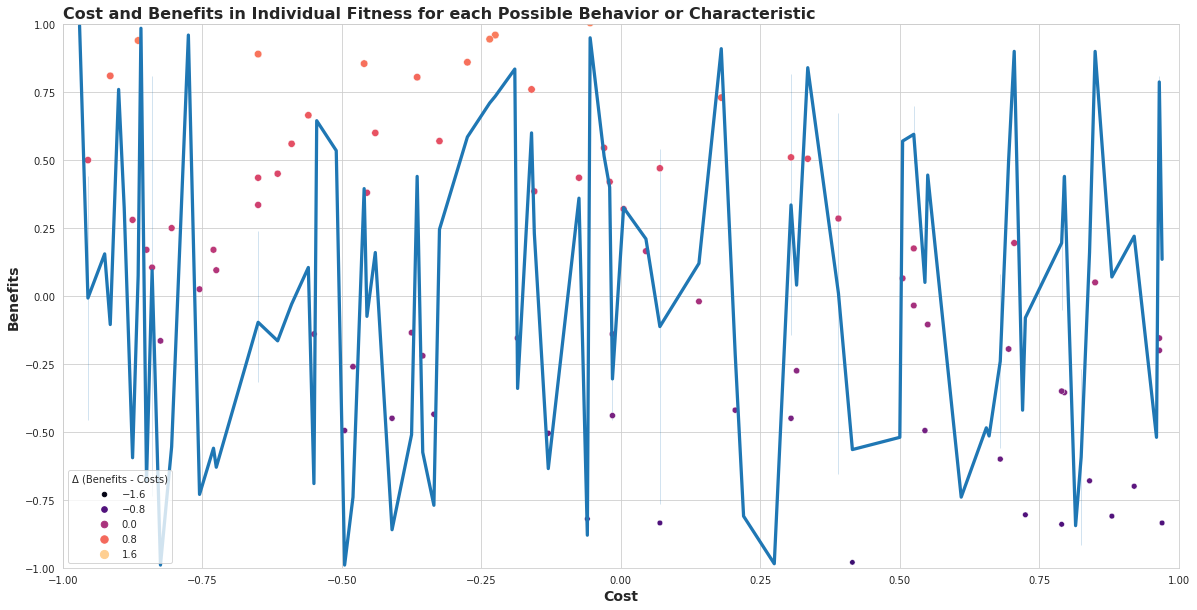

In [6]:
sns.set_style('whitegrid')
magma = sns.color_palette("magma", as_cmap=True)
plt.figure(figsize= (20,10))
sns.lineplot(x = df.Costs, y = df.Benefits , linewidth = 3.25 ,
             palette = magma).set(xlim = (-1.00, 1.00) , ylim = (-1.00, 1.00))

sns.scatterplot(x = df.Costs , y = df['Δ (Benefits - Costs)'] , hue = df['Δ (Benefits - Costs)'],
                size = df['Δ (Benefits - Costs)'] , palette = magma)

plt.xlabel('Cost', fontsize = 14 , fontweight = 'bold')
plt.ylabel('Benefits' , fontsize = 14 , fontweight = 'bold')
plt.title('Cost and Benefits in Individual Fitness for each Possible Behavior or Characteristic' , fontsize = 16 ,
          fontweight = 'bold' , loc = 'left' )




Text(0.5, 1.0, 'Density Probabilistic Distribution of Δ (benefit-to-cost-ratio)')

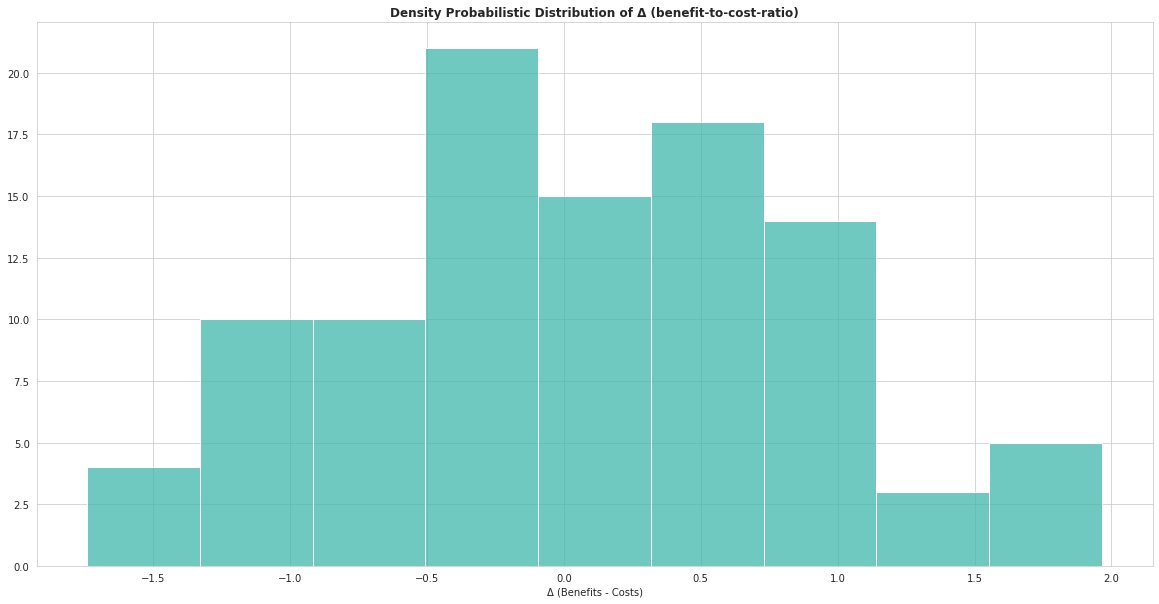

In [7]:
plt.figure(figsize = (20,10))
mako = sns.color_palette("mako", as_cmap = False)
sns.histplot(df['Δ (Benefits - Costs)'], color = mako[4], )
plt.ylabel('')
plt.title('Density Probabilistic Distribution of Δ (benefit-to-cost-ratio)', weight = 'bold')

<Figure size 1440x720 with 0 Axes>

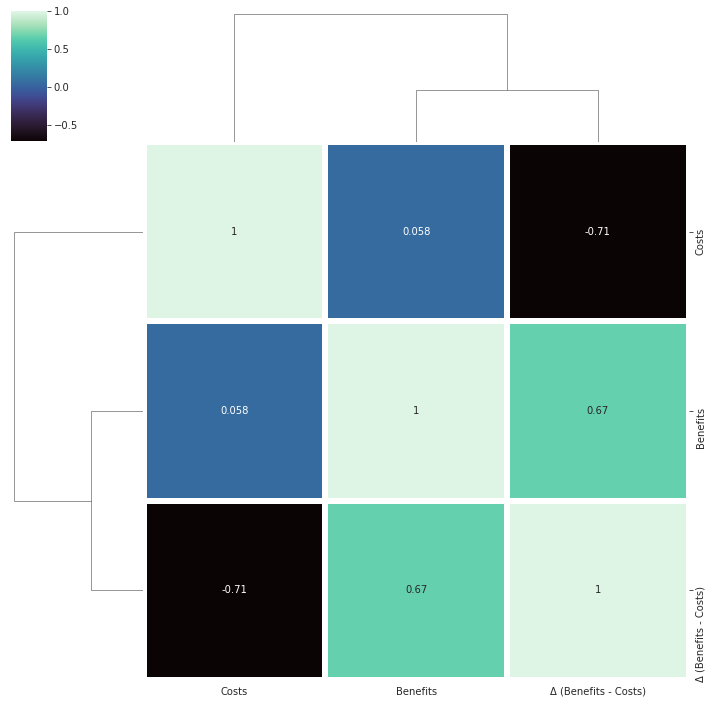

In [8]:
corrPearson = df.corr()

mako = sns.color_palette("mako", as_cmap = True)
plt.figure(figsize= (20,10))
sns.clustermap(corrPearson , cmap = mako , linewidths= 5 , 
            annot = True , )

# Note that Δ (Benefits - Costs) measures the total net-fitness result
# And is negatively correlated with Cost and positive Correlated with Benefits
# Benefits and Cost aren't highly correlated (thus possibilitating we acquire an normal distribution, 
# where it seems to be an more accurate modelling of the natural world,following Central Limit Theorem)
# The Δ is the measurement of how likely is to an characteristic being selected by Natural Selection through Direct Fitness


We gonna generate 10 random behaviors with their own cost and benefits and predict what would be the behavior prioritized by Natural Selection

In [12]:
Costs = [.20 , .40 , .60 , .80 , .100] #I am limitating the possible costs that can be taken (Just for better visualization)


CostBehavior = []
BenefitsBehavior = [] 
BehaviorLabel = [] 
BehaviorDelta = []



CostBehavior.append(random.choice(Costs))
BenefitsBehavior.append(random.choice(Benefits))
BehaviorDelta.append(BenefitsBehavior[0] - CostBehavior[0])
BehaviorLabel.append('A')
CostBehavior.append(random.choice(Costs))
BenefitsBehavior.append(random.choice(Benefits))
BehaviorDelta.append(BenefitsBehavior[1] - CostBehavior[1])
BehaviorLabel.append('B')
CostBehavior.append(random.choice(Costs))
BenefitsBehavior.append(random.choice(Benefits))
BehaviorDelta.append(BenefitsBehavior[2] - CostBehavior[2])
BehaviorLabel.append('C')
CostBehavior.append(random.choice(Costs))
BenefitsBehavior.append(random.choice(Benefits))
BehaviorDelta.append(BenefitsBehavior[3] - CostBehavior[3])
BehaviorLabel.append('D')
CostBehavior.append(random.choice(Costs))
BenefitsBehavior.append(random.choice(Benefits))
BehaviorDelta.append(BenefitsBehavior[4] - CostBehavior[4])
BehaviorLabel.append('E')



In [13]:
Behaviors = pd.DataFrame()
Behaviors['Behavior'] = BehaviorLabel
Behaviors['Cost'] = CostBehavior
Behaviors['Benefit'] = BenefitsBehavior
Behaviors['Δ (Benefits - Costs)'] = BehaviorDelta
Behaviors

,Behavior,Cost,Benefit,Δ (Benefits - Costs)
0,A,0.4,-0.125,-0.525
1,B,0.1,0.955,0.855
2,C,0.6,0.440,-0.160
3,D,0.8,0.060,-0.740
4,E,0.2,0.550,0.350


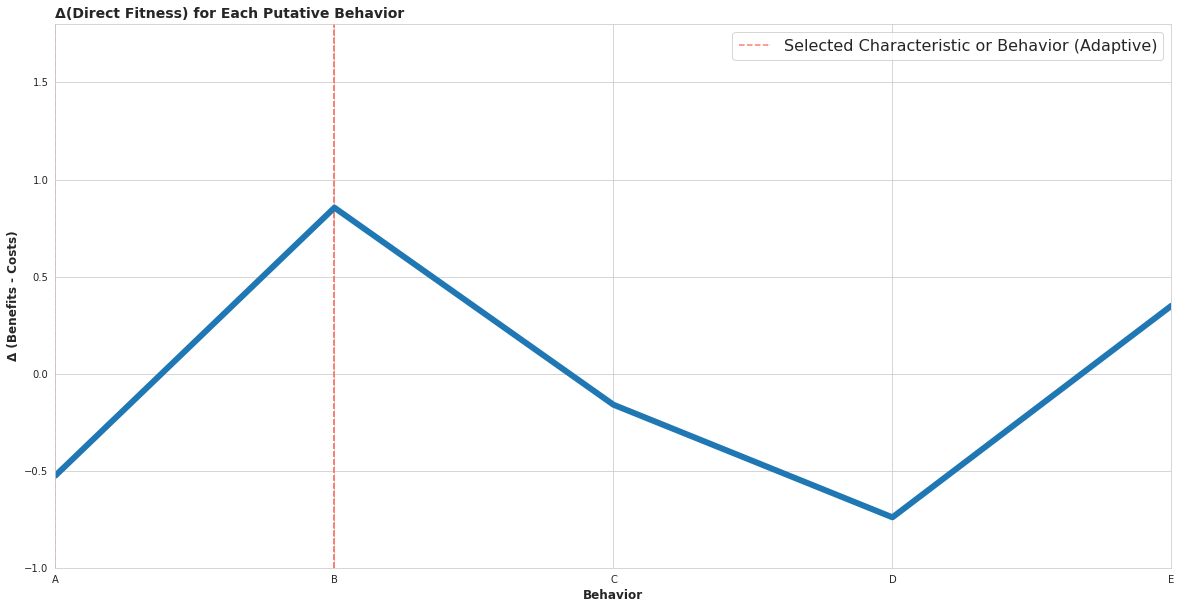

In [14]:
plt.figure(figsize = (20,10))

size = Behaviors['Δ (Benefits - Costs)']  * 100
cmap = sns.color_palette("dark:salmon_r", as_cmap=True)
sns.lineplot(x = Behaviors['Behavior'] ,y = Behaviors['Δ (Benefits - Costs)'] ,
             linewidth = 6,).set(xlim = ('A' , 'E' ) , ylim = (-1.0  , 1.8))


plt.xlabel('Behavior' , fontsize = 12 , weight = 'bold')
plt.ylabel('Δ (Benefits - Costs)', weight = 'bold' , fontsize = 12)
plt.title('Δ(Direct Fitness) for Each Putative Behavior' , fontsize = 14,
          loc = 'left', weight = 'bold')


bestRatio = []
z = 0
Label = [] 

for i in Behaviors.Behavior:
  if i == 'A':
    bestratio = Behaviors['Δ (Benefits - Costs)'][z]
    label = i
  if Behaviors['Δ (Benefits - Costs)'][z] >= bestratio:
    bestratio = Behaviors['Δ (Benefits - Costs)'][z]
    label = i
  bestRatio.append(bestratio)
  Label.append(label)
  z += 1
plt.vlines(Label , -1.0 , 1.8, color = 'salmon', linestyles= 'dashed',
           label = 'Selected Characteristic or Behavior (Adaptive)',)
plt.legend(fontsize = 16)
